In [29]:
import yfinance as yf
import pandas as pd
import quandl 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
desemprego = pd.read_csv('./materiais/STP-20220317102940796.csv', encoding='latin1', sep=';')

In [31]:
desemprego.head()

,Data,24369 - Taxa de desocupação - PNADC - %,24371 - Empregados no setor privado e público - PNADC - Unidades (mil),24372 - Empregados no setor público - PNADC - Unidades (mil),24373 - Empregado por conta própria - PNADC - Unidades (mil),24375 - Empregados no setor privado - Com carteira - PNADC - Unidades (mil),24376 - Empregados no setor privado - Sem Carteira - PNADC - Unidades (mil),24377 - Empregados no setor privado - Total - PNADC - Unidades (mil)
0,03/2012,"8,0",62.105,10.767,20.174,34.262,11.122,45.384
1,04/2012,"7,8",62.586,10.884,20.205,34.574,11.180,45.754
2,05/2012,"7,7",62.927,10.925,20.165,34.759,11.244,46.003
3,06/2012,"7,6",63.299,11.031,19.930,35.004,11.265,46.269
4,07/2012,"7,5",63.523,11.119,19.843,35.120,11.293,46.413


In [32]:
desemprego.columns.tolist()

['Data',
 '24369 - Taxa de desocupação - PNADC - %',
 '24371 - Empregados no setor privado e público - PNADC - Unidades (mil)',
 '24372 - Empregados no setor público - PNADC - Unidades (mil)',
 '24373 - Empregado por conta própria - PNADC - Unidades (mil)',
 '24375 - Empregados no setor privado - Com carteira - PNADC - Unidades (mil)',
 '24376 - Empregados no setor privado - Sem Carteira - PNADC - Unidades (mil)',
 '24377 - Empregados no setor privado - Total - PNADC - Unidades (mil)']

In [33]:
desemprego.dtypes

Data                                                                           object
24369 - Taxa de desocupação - PNADC - %                                        object
24371 - Empregados no setor privado e público - PNADC - Unidades (mil)         object
24372 - Empregados no setor público - PNADC - Unidades (mil)                   object
24373 - Empregado por conta própria - PNADC - Unidades (mil)                   object
24375 - Empregados no setor privado - Com carteira - PNADC - Unidades (mil)    object
24376 - Empregados no setor privado - Sem Carteira - PNADC - Unidades (mil)    object
24377 - Empregados no setor privado - Total - PNADC - Unidades (mil)           object
dtype: object

In [34]:
columns = desemprego.columns.to_list()
desemprego.rename(
    columns={
        columns[1]:'Taxa de desocupação',
        columns[2]:'Empregados no setor privado e público',
        columns[3]:'Empregados no setor público',
        columns[4]:'Empregados por conta própria',
        columns[5]:'Empregados no setor privado - com carteira',
        columns[6]:'Empregados no setor privado - sem carteira',
        columns[7]:'Empregados no setor privado - total'
    }, 
    inplace= True
)

In [35]:
desemprego.tail()

,Data,Taxa de desocupação,Empregados no setor privado e público,Empregados no setor público,Empregados por conta própria,Empregados no setor privado - com carteira,Empregados no setor privado - sem carteira,Empregados no setor privado - total
114,09/2021,"12,6",61.724,11.168,25.461,33.508,11.691,45.199
115,10/2021,"12,1",62.497,11.152,25.638,33.876,11.956,45.832
116,11/2021,"11,6",63.287,11.275,25.841,34.224,12.179,46.403
117,12/2021,"11,1",64.010,11.375,25.944,34.495,12.443,46.938
118,Fonte,IBGE,IBGE,IBGE,IBGE,IBGE,IBGE,IBGE


In [36]:
desemprego.drop(desemprego.query('Data == "Fonte"').index, inplace=True)

In [37]:
desemprego.dtypes

Data                                          object
Taxa de desocupação                           object
Empregados no setor privado e público         object
Empregados no setor público                   object
Empregados por conta própria                  object
Empregados no setor privado - com carteira    object
Empregados no setor privado - sem carteira    object
Empregados no setor privado - total           object
dtype: object

In [38]:
desemprego.Data = pd.to_datetime(desemprego.Data, format='%m/%Y')

In [39]:
for coluna in desemprego.select_dtypes(object):
    if coluna == 'Taxa de desocupação':
        desemprego[coluna] = desemprego[coluna].str.replace(',','.').astype(float)
    else:
        desemprego[coluna] = desemprego[coluna].astype(float)


In [40]:
desemprego.dtypes

Data                                          datetime64[ns]
Taxa de desocupação                                  float64
Empregados no setor privado e público                float64
Empregados no setor público                          float64
Empregados por conta própria                         float64
Empregados no setor privado - com carteira           float64
Empregados no setor privado - sem carteira           float64
Empregados no setor privado - total                  float64
dtype: object

In [41]:
desemprego.head()

,Data,Taxa de desocupação,Empregados no setor privado e público,Empregados no setor público,Empregados por conta própria,Empregados no setor privado - com carteira,Empregados no setor privado - sem carteira,Empregados no setor privado - total
0,2012-03-01,8.0,62.105,10.767,20.174,34.262,11.122,45.384
1,2012-04-01,7.8,62.586,10.884,20.205,34.574,11.180,45.754
2,2012-05-01,7.7,62.927,10.925,20.165,34.759,11.244,46.003
3,2012-06-01,7.6,63.299,11.031,19.930,35.004,11.265,46.269
4,2012-07-01,7.5,63.523,11.119,19.843,35.120,11.293,46.413


In [42]:
desemprego.set_index('Data', inplace=True)

<AxesSubplot:xlabel='Data'>

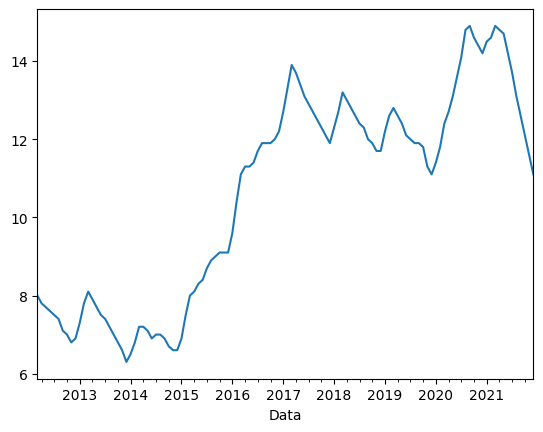

In [43]:
desemprego['Taxa de desocupação'].plot()

<AxesSubplot:xlabel='Data'>

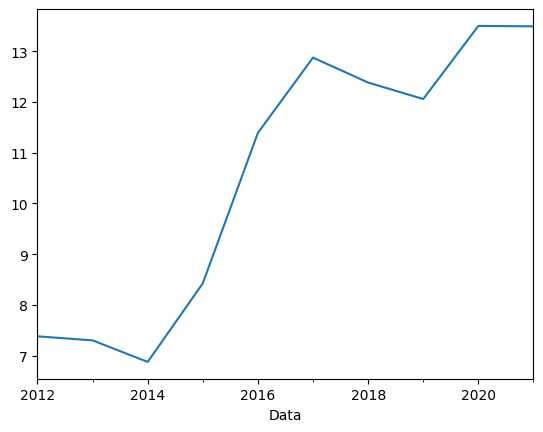

In [44]:
desemprego['Taxa de desocupação'].resample('Y').agg(np.mean).plot()

<AxesSubplot:xlabel='Data'>

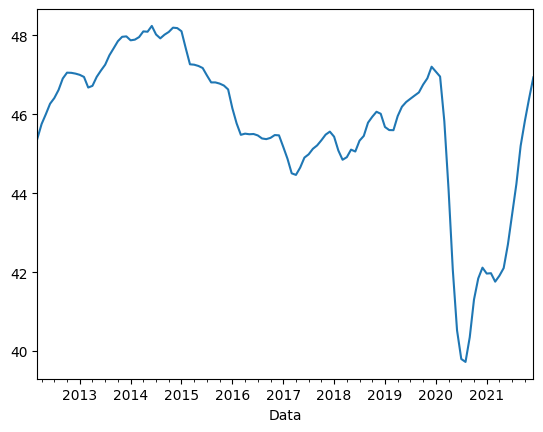

In [45]:
desemprego['Empregados no setor privado - total'].plot()

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
